In [1]:
import numpy as np
import h5py as h5
import fitsio as fio
import swiftsimio as sw
import matplotlib
from matplotlib import pyplot as plt
import proplot as pplt
%matplotlib inline

/cosma/home/do012/dc-yama3/miniforge3/envs/env_dev/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
root = "/cosma8/data/do012/dc-yama3/"

# Check overdensity and velocity field computed by CIC for L0100N0180 run. 

In [3]:
d_deltam = fio.read(root+'L0100N0180/overdensity_3d_snapshot_0000.fits')
print(d_deltam.shape)

data0000 = sw.load('/cosma8/data/dp004/flamingo/Runs/L0100N0180/HYDRO_FIDUCIAL/snapshots/flamingo_0000.hdf5')
x_sample = data0000.dark_matter.coordinates[:,0]#[idx]
y_sample = data0000.dark_matter.coordinates[:,1]#[idx]
z_sample = data0000.dark_matter.coordinates[:,2]#[idx]

(64, 512, 512, 512)


In [4]:
grid_size = 512
box_size = 1000.0
grid_pos = np.linspace(0, box_size, grid_size)

mean_deltam = np.mean(d_deltam, axis=0)
threshold = 0.0 # Example value; adjust based on your data
# Find the indices where the overdensity exceeds the threshold
x, y, z = np.where(mean_deltam > threshold)

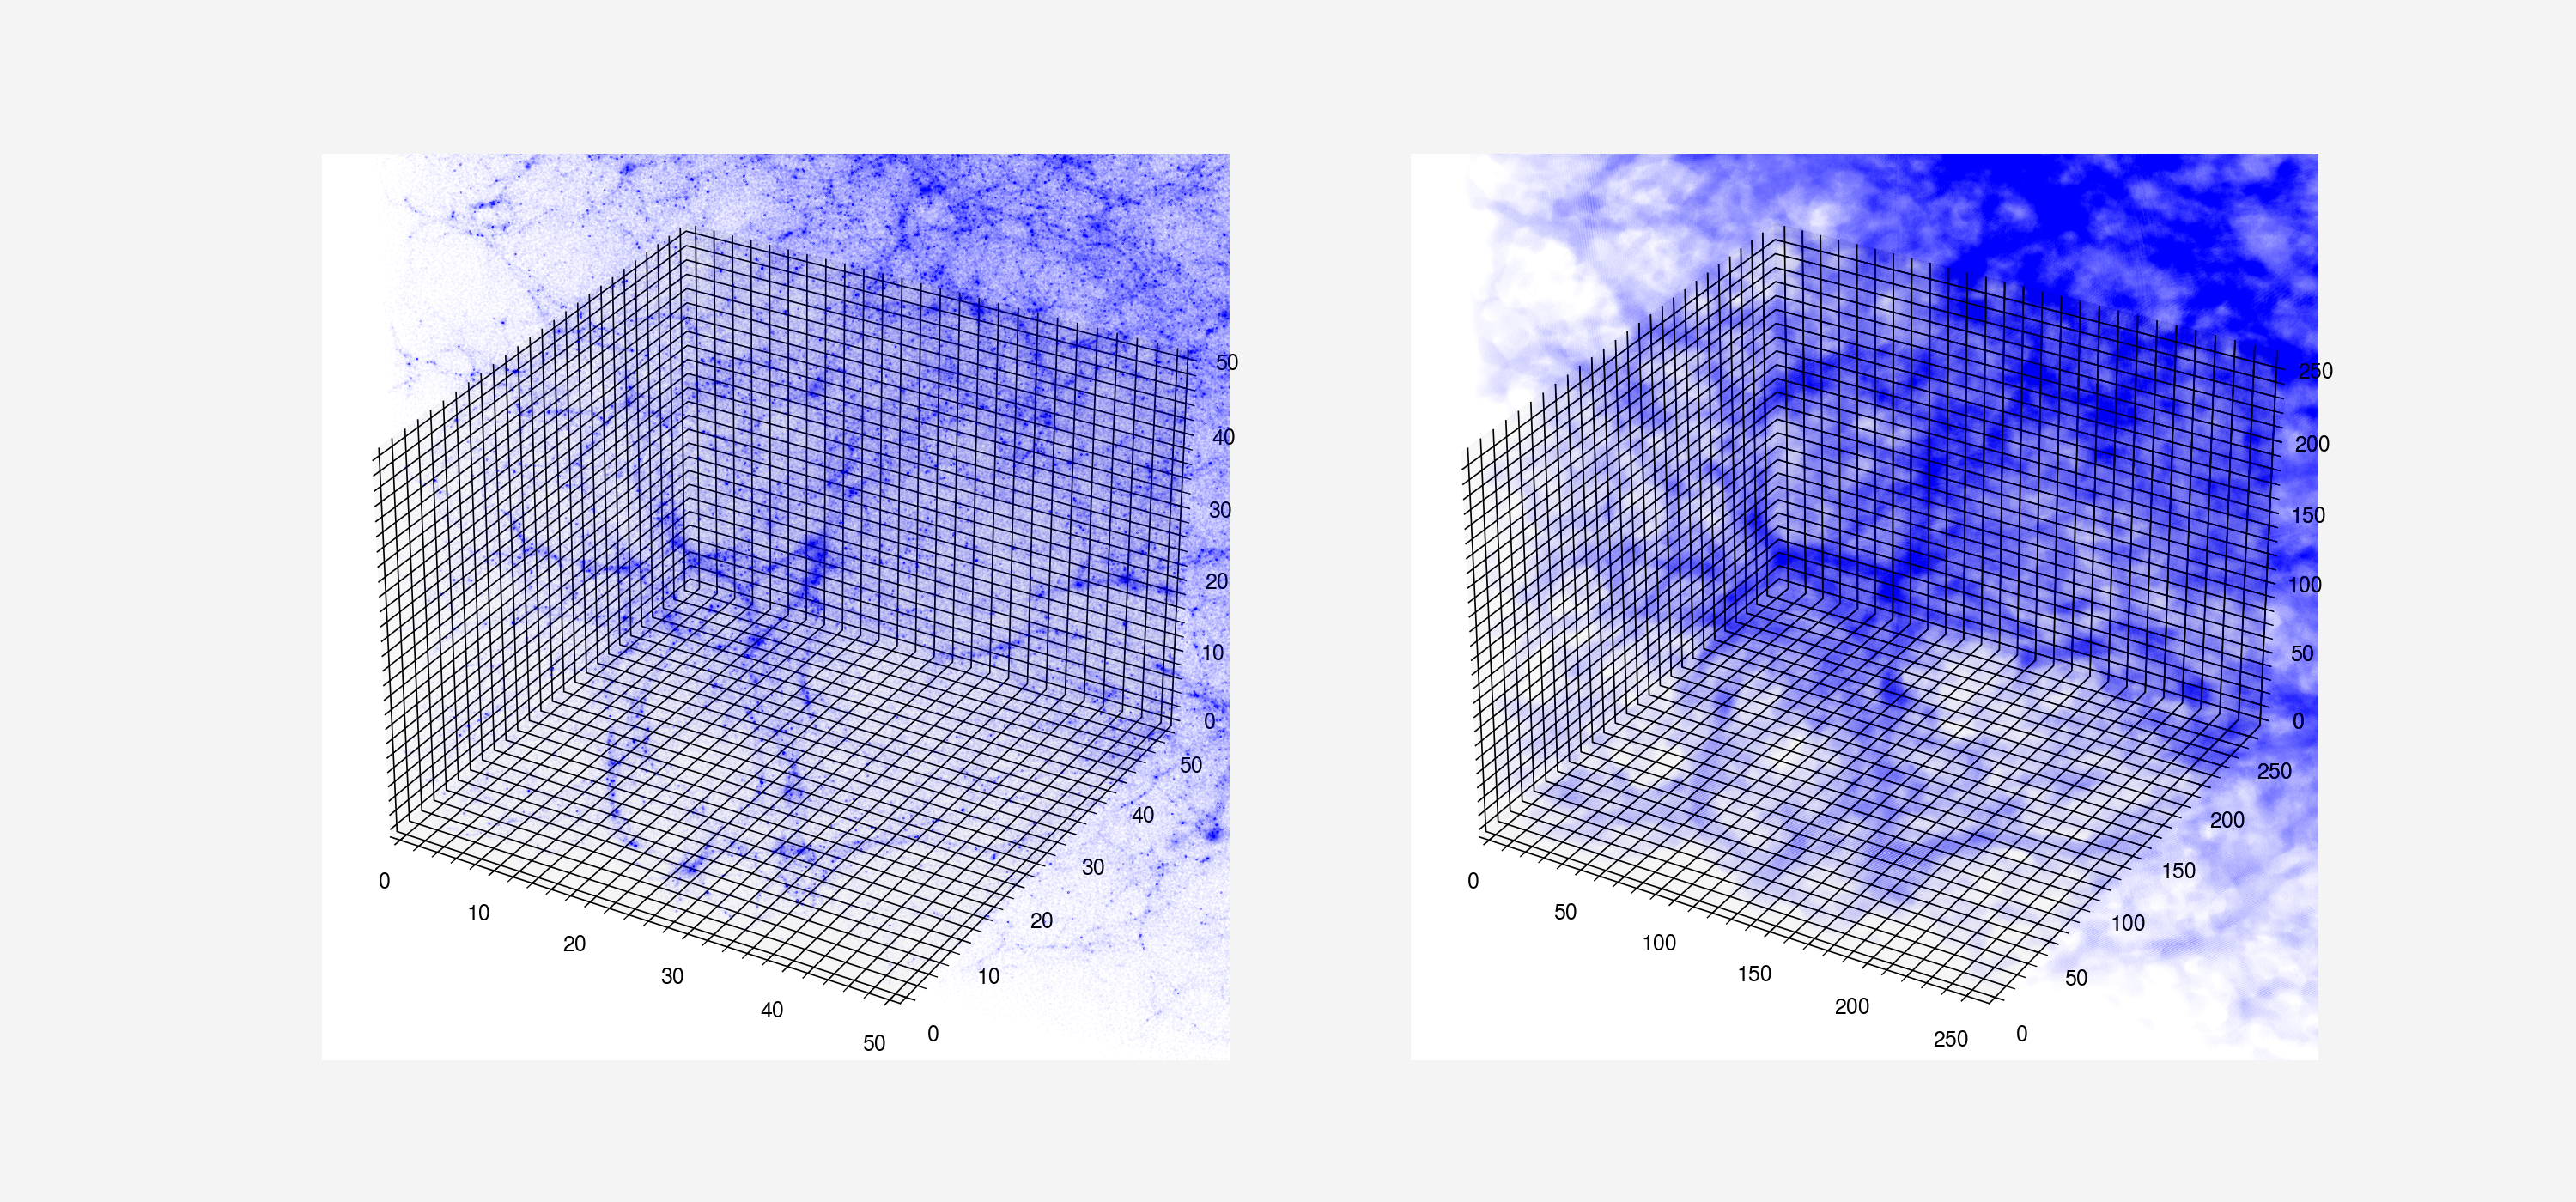

In [13]:
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(121, projection='3d')
ax0.scatter(x_sample, y_sample, z_sample, s=0.0001, c='blue', label='gas particles')
ax0.set_xlim(0, 50); ax0.set_ylim(0, 50); ax0.set_zlim(0, 50); 

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(x, y, z, s=0.00001, c='blue', label='matter overdensity')
ax1.set_xlim(0, 256); ax1.set_ylim(0, 256); ax1.set_zlim(0, 256); 

In [14]:
# check velocity field here.
d_velo = fio.read(root+'L0100N0180/velocity_3d_snapshot_0000.fits')
print(d_velo.shape)

(64, 512, 512, 512)


In [10]:
d_deltam = fio.read(root+'L1000N1800/overdensity_3d_snapshot_0000.fits')
grid_size = 512
box_size = 1000.0
grid_pos = np.linspace(0, box_size, grid_size)

mean_deltam = np.mean(d_deltam, axis=0)
threshold = 0.0 # Example value; adjust based on your data
# Find the indices where the overdensity exceeds the threshold
x, y, z = np.where(mean_deltam > threshold)

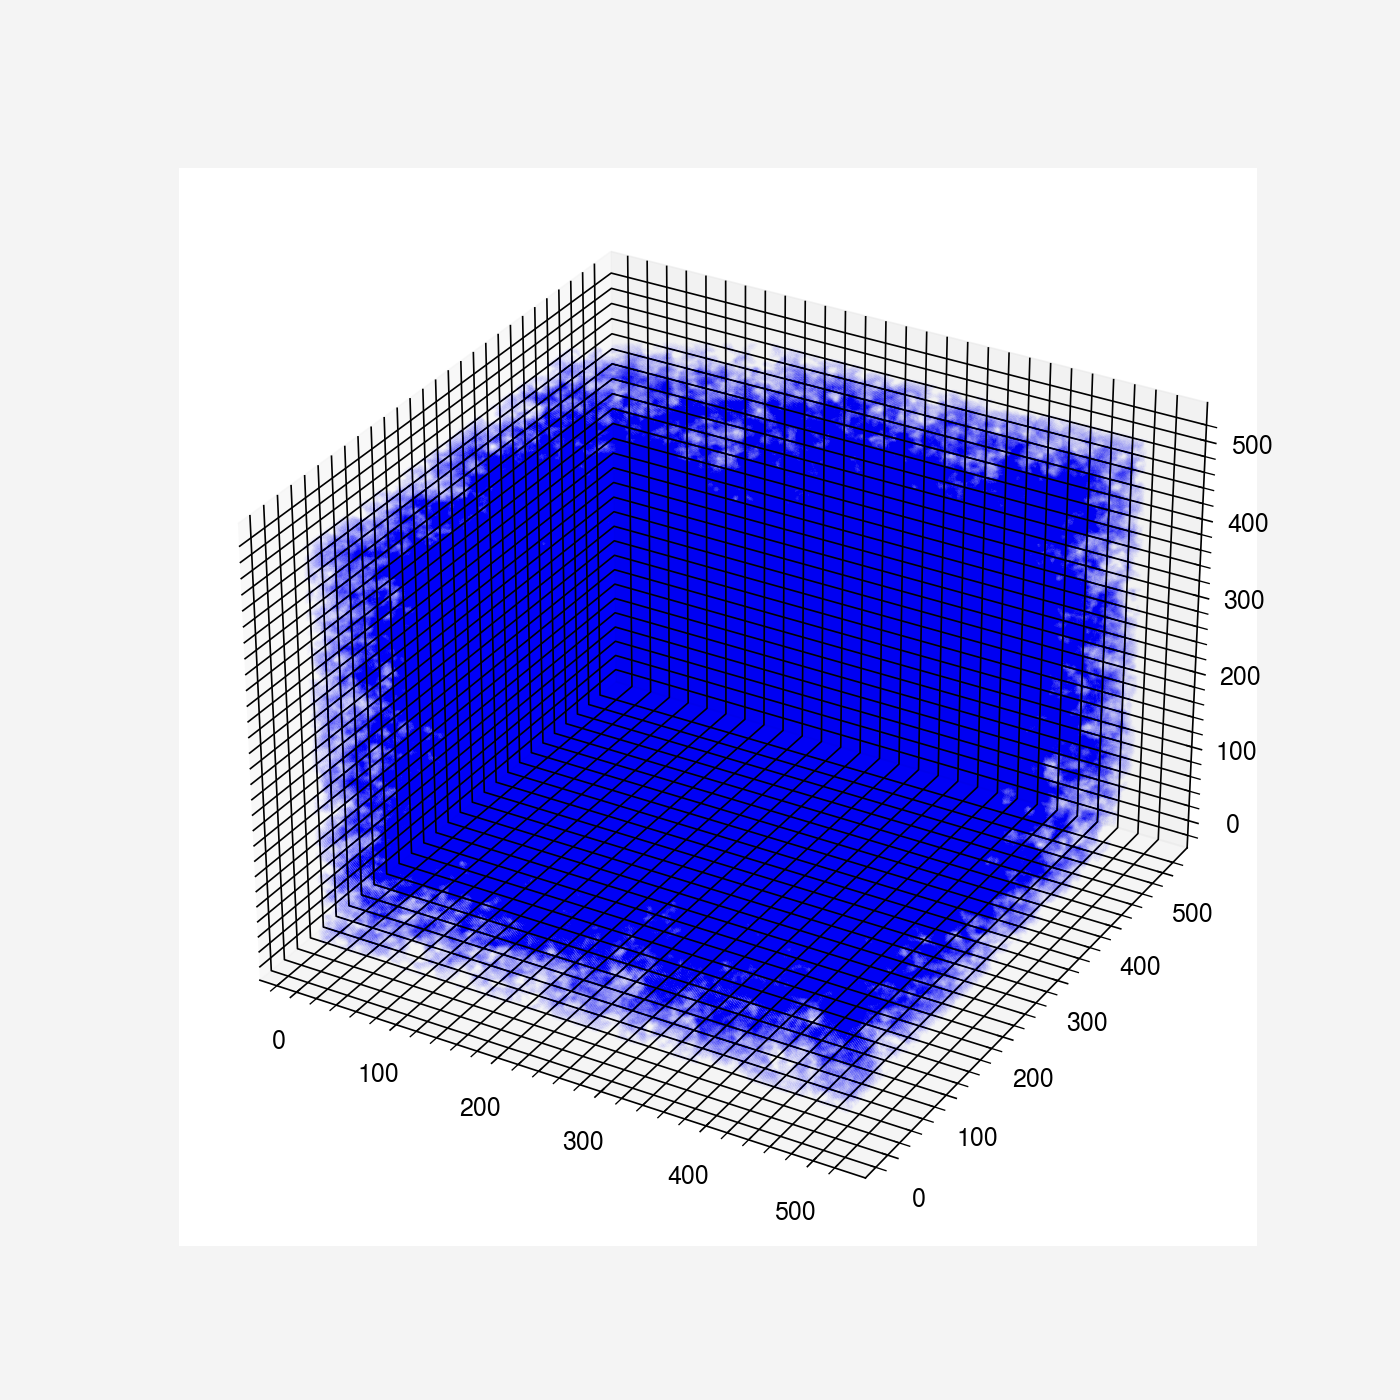

In [12]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, s=0.000001, c='blue', label='matter overdensity')
# ax1.set_xlim(0, 256); ax1.set_ylim(0, 256); ax1.set_zlim(0, 256); 